# Report

Grupo 1:
- Felipe Sagasti - 103730
- Marcos Bianchi - 108921

## Objetivos
Los objetivos de este trabajo práctico son:
- La implementación en Python de los métodos de búsqueda de raíces vistos en clase, a saber, Bisección, Punto Fijo, Newton-Raphson, Newton-Raphson modificado y Secante.
- La experimentación con dichos métodos realizando búsqueda de raíces para funciones.
- La comparación de dichos métodos entre sí.
- La búsqueda de casos de falla para cada método.

## Introduccion
Este trabajo práctico busca investigar las virtudes y desventajas de los métodos de búsqueda de raíces vistos hasta el momento. Para hacerlo, se realizan pruebas con funciones que dan un resultado exitoso, otras con funciones que dan una falla, y luego para una función que sea un caso exitoso para todos los métodos, se realiza la búsqueda de una raíz con todos ellos para poder comparar su desempeño. Se espera obtener empíricamente un resultado similar a los comprobados analíticamente en clase.

## Cuerpo

El desarrollo del trabajo práctico comenzó con la implementación de los métodos de búsqueda de raíces en Python (los cuales pueden ser visualizados en los archivos con sus respectivos nombres) en el orden visto en clase, ya que el método de Bisección es el más simple conceptualmente por lo que representaba una buena forma de familiarizarse con la problemática, y el método de Punto Fijo nos serviría para implementar Newton Raphson y Newton Raphson Modificado aprovechando que ambos pueden verse como un caso particular del mismo desde el punto de vista de la implementación.
Una vez implementados los métodos se buscó primero casos de éxito para cada uno de ellos y se encontró un caso de éxito común para poder avanzar sobre las métricas necesarias para realizar las comparaciones pedidas. Estas métricas fueron:

- Orden de Convergencia
- Constante Asintótica
- Cota de error logarítmica

Finalmente, al haber establecido las comparaciones y los gráficos que nos ayuden a compararlas, se buscó casos de falla para cada uno de los métodos.

A continuación se muestra el desarrollo en código y con gráficos de lo planteado en esta sección.

In [107]:
from bisection import bisection
from fixed_point import fixed_point
from newton_raphson import newton_raphson
from newton_raphson_modified import newton_raphson_modified
from secant import secant

In [108]:
# Celda que contiene funciones auxiliares y la
# definición de las funciones necesarias para obtener 
# las métricas de comparación requeridas
 
from math import log, log10

def windows(arr, window_size):
    for i in range(len(arr) - window_size + 1):
        yield tuple(arr[i:i + window_size])


def order_of_convergence(x3, x2, x1, x0):
    num = log(abs((x0 - x1) / (x1 - x2)))
    den = log(abs((x1 - x2) / (x2 - x3)))
    return num / den


def ocs(table):
    return [
        order_of_convergence(x3[0], x2[0], x1[0], x0[0])
        for x3, x2, x1, x0 in windows(table, 4)
    ]


def asymptotic_constant(x3, x2, x1, x0):
    num = abs(x1 - x0)
    den = abs(x2 - x1) ** order_of_convergence(x3, x2, x1, x0)
    return num / den


def acs(table):
    return [
        asymptotic_constant(x3[0], x2[0], x1[0], x0[0])
        for x3, x2, x1, x0 in windows(table, 4)
    ]


def error(table):
    return [
        log10(abs(x0[0] - x1[0]))
        for x1, x0 in windows(table, 2)
    ]

In [109]:
# Celda que contiene las llamadas de todos los métodos
# implementados para una función que represente un
# caso de éxito en cada una de ellas

from math import sin, cos

f   = lambda x: 0.2 * (x - 1) ** 2 + sin(x - 1)
df  = lambda x: 0.4 * (x - 1) + cos(x - 1)
d2f = lambda x: 0.4 - sin(x - 1)

bis = bisection(f, -1, 4, 10e-3)
fip = fixed_point(f, 7.1, 10e-8)
n_r = newton_raphson(f, df, 7, 10e-9)
nrm = newton_raphson_modified(f, df, d2f, 8, 10e-9)
sec = secant(f, 2, -4, 10e-10)

[len(bis), len(fip), len(n_r), len(nrm), len(sec)]

[9, 8, 8, 9, 9]

## Order of Convergence



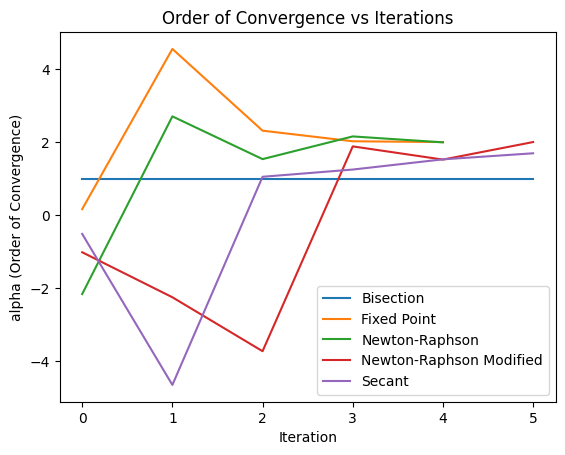

In [110]:
import matplotlib.pyplot as plt

plt.plot(ocs(bis), label="Bisection")
plt.plot(ocs(fip), label="Fixed Point")
plt.plot(ocs(n_r), label="Newton-Raphson")
plt.plot(ocs(nrm), label="Newton-Raphson Modified")
plt.plot(ocs(sec), label="Secant")

plt.title("Order of Convergence vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("alpha (Order of Convergence)")
plt.legend()
plt.show()

## Asymptotic Constant

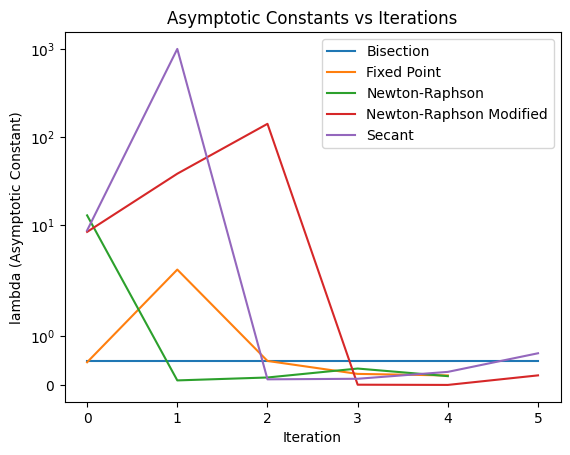

In [111]:
plt.plot(acs(bis), label="Bisection")
plt.plot(acs(fip), label="Fixed Point")
plt.plot(acs(n_r), label="Newton-Raphson")
plt.plot(acs(nrm), label="Newton-Raphson Modified")
plt.plot(acs(sec), label="Secant")

plt.title("Asymptotic Constants vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("lambda (Asymptotic Constant)")
plt.yscale("symlog")
plt.legend()
plt.show()

## Error Module

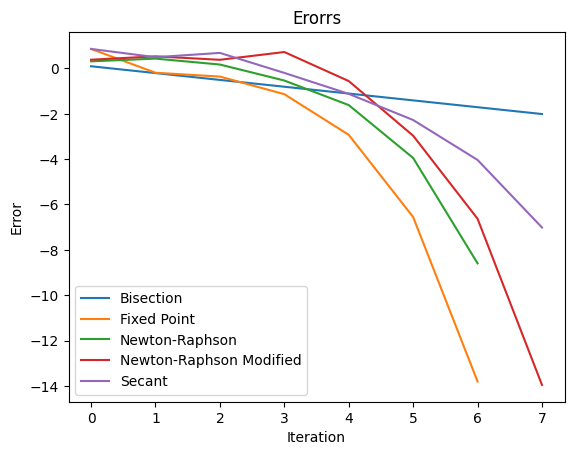

In [112]:
plt.plot(error(bis), label="Bisection")
plt.plot(error(fip), label="Fixed Point")
plt.plot(error(n_r), label="Newton-Raphson")
plt.plot(error(nrm), label="Newton-Raphson Modified")
plt.plot(error(sec), label="Secant")

plt.title("Erorrs")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

# Error cases

A continuación se encuentran los casos de falla encontrados para cada método implementado, acompañado de un gráfico de la función en cuestión como ayuda visual.

In [113]:
# Celda de funciones auxiliares para facilitar la generación de gráficos

import numpy as np


def log_root(table):
    root, value = table[-1][0], table[-1][1]
    print(f"found x = {root} with f(x) = {value}")


def plot(a, b, f, title):
    xs = np.linspace(a, b)
    ys = f(xs)
    plt.plot(xs, ys)
    plt.axhline(color="black",linewidth="0.7")
    plt.axvline(color="black",linewidth="0.7")
    plt.grid(True)
    plt.title(title)
    plt.show()

### Bisection

[Success]
found x = -1.41815185546875 with f(x) = -3.957298560651531e-06
[Failure]
f(pn) has no sign


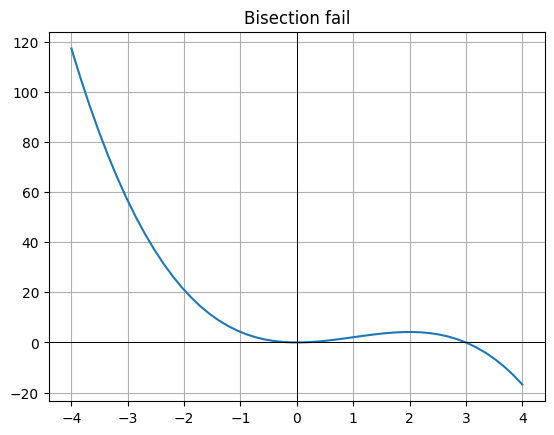

In [114]:
from math import sin, cos, exp, pi

# sacado del ej. 1 de la guia 2.
def f(x):
    return exp(x) * (sin(x) + cos(x) - 2 * x - 2)

print("[Success]")
table = bisection(f, -2.5, -0.5, 10e-5)
log_root(table)

def f(x):
    # R = 1
    return pi * x ** 2 * (3 - x) / 3

print("[Failure]")
try:
    table = bisection(f, -4, 4)
except ValueError as v:
    print(v)

# El método falla porque al calcular el centro del intervalo resulta en 0,
# donde f(0) = 0 y al comparar el cambio de signo con f(a) este se anula, por lo
# que no existe, esto se modela lanzando una excepción.

plot(-4, 4, f, "Bisection fail")

### Fixed point

[Success]
found x = 1.9337524076778332 with f(x) = -1.7913940076885737e-06
[Failure]
found x = 7999.999981810108 with f(x) = 1.776356835361283e-12


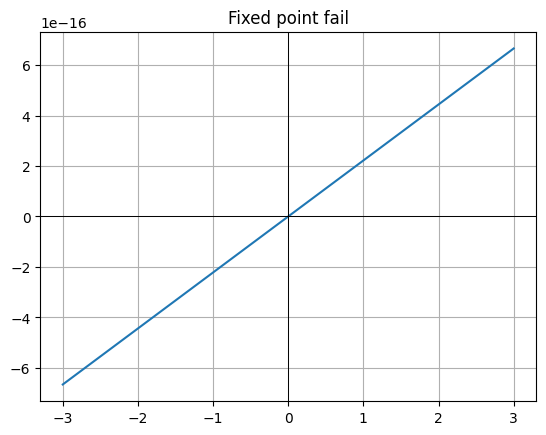

In [115]:
from math import sin
from sys import float_info

# sacado del ej. 4 de la guia 2.
def f(x):
    return x ** 2 / 4 - sin(x)

print("[Success]")
table = fixed_point(f, 1.75, 10e-6)
log_root(table)

def f(x):
    return float_info.epsilon * x

print("[Failure]")
# Se tomó el intervalo [0, 16_000]
table = fixed_point(f, 8000, max_iter=10_000_000)
log_root(table)

# Esta f tiene una única raíz en 0. Su problema es que crece muy lentamente,
# la función g(x) = x - f(x) resulta tener una derivada constante muy cercana
# a 1. Por lo que xn+1 ~= xn - f(xn) y avanza muy despacio llegando a la máxima
# cantidad de iteraciones casi sin haber hecho progreso.

# Notar la escala del eje y.
plot(-3, 3, f, "Fixed point fail")

### Newton-Raphson Modified

[Success]
found x = 2.0000000040807704 with f(x) = -3.552713678800501e-15
[Failure]
found x = 0.0 with f(x) = -1.0


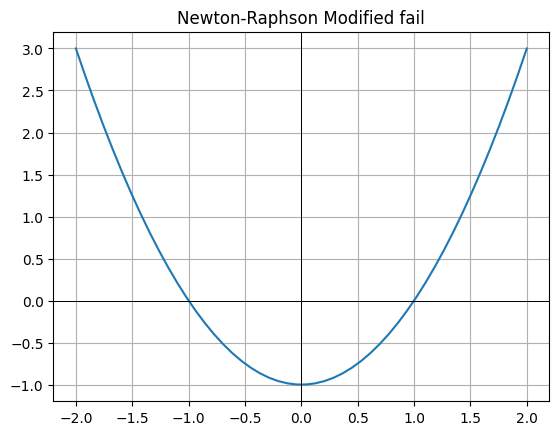

In [116]:
# sacado del ej. 12, b de la guia 2.
def f(x):
    return x ** 3 - 9 * x ** 2 + 24 * x - 20

def df(x):
    return 3 * x ** 2 - 18 * x + 24

def d2f(x):
    return 6 * x - 18

print("[Success]")
table = newton_raphson_modified(f, df, d2f, 1.5, 10e-4)
log_root(table)

def f(x):
    return x ** 2 - 1

def df(x):
    return 2 * x

def d2f(_):
    return 2

print("[Failure]")
# Se tomó el intervalo [-2, 2]
table = newton_raphson_modified(f, df, d2f, 0, 10e-5)
log_root(table)

# Elegímos una función tal que f(0) != 0, f'(0) = 0 y f''(0) != 0, donde
# se anule el segundo termino de g quedando que xn+1 = xn - 0. Por lo que
# el método se estanca y no progresa.

plot(-2, 2, f, "Newton-Raphson Modified fail")

### Newton-Raphson

[Success]
found x = 1.9999999642009965 with f(x) = 0.0
[Failure]
found x = 5.971758207658714 with f(x) = 0.0


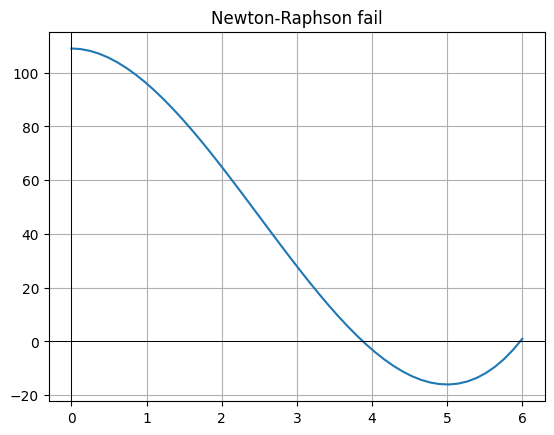

In [117]:
from sys import float_info

# sacado del ej. 12 de la guia 2.
def f(x):
    return x ** 3 - 9 * x ** 2 + 24 * x - 20

def df(x):
    return 3 * x ** 2 - 18 * x + 24

print("[Success]")
table = newton_raphson(f, df, 1.5)
log_root(table)

def f(x):
    return 2 * x ** 3 - 15 * x ** 2 + 109

def df(x):
    return 6 * x ** 2 - 30 * x

print("[Failure]")
# Se eligió el intervalo (0, 5)
table = newton_raphson(f, df, float_info.epsilon)
log_root(table)

# Este es un caso de falla porque en el intervalo elegido no se anula
# la derivada y la función es continua pero la raíz encontrada está fuera.

plot(0, 6, f, "Newton-Raphson fail")

### Secant

[Success]
found x = 1.9337614641223735 with f(x) = 1.0180519072200411e-05
[Failure]
float division by zero


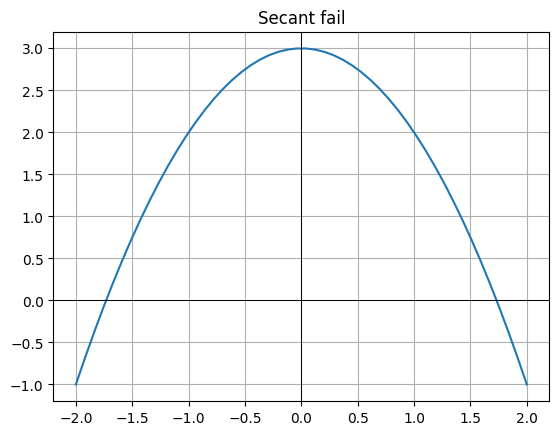

In [118]:
from math import sin

# sacado del ej. 16 de la guia 2.
def f(x):
    return x ** 2 / 4 - sin(x)

print("[Success]")
table = secant(f, 1.5, 2, 10e-6)
log_root(table)

def f(x):
    return 3 - x ** 2

print("[Failure]")
try:
    table = secant(f, 2, -1)
except ZeroDivisionError as e:
    print(e)

# El método falla porque al trazar la primer secante se obtiene xn+1 = 1, en la
# próxima iteración xn-1 = -1 y ahora xn = 1, como f(-1) = f(1) => se divide por 0
# y el método se rompe.

plot(-2, 2, f, "Secant fail")

# Conclusión

Durante el desarrollo del trabajo práctico se pudo visualizar empíricamente lo analizado en clase, como la marcada diferencia en la cantidad de iteraciones necesarias para obtener una raíz por medio del método de Bisección, y los demás métodos, así como las problemáticas que pueden traer algunos de los métodos más veloces al caer en casos de falla, o no ser provistos con las semillas adecuadas.

En particular, visualizando el gráfico obtenido para el orden de convergencia de cada método se puede visualizar la tendencia de todos ellos hacia su orden teórico. Un caso que vale la pena destacar es el del método del Punto Fijo, el cual pareciera indicar en la gráfica un orden de convergencia más inclinado hacia el lado del cuadrático que del lineal. Entendemos que esto se dió a que no hemos encontrado un caso que requiriera un nivel mayor de iteraciones para este método, y por lo tanto observamos una convergencia en cantidad de iteraciones para el método del Punto Fijo similar a la del método de Newton Raphson.

Finalizado el desarrollo del trabajo práctico, nos sorprendió que la tarea más laboriosa fue la búsqueda de casos de falla para los métodos, implicando un análisis de los casos en los que las funciones matemáticas que los definen no estarían definidas (por ejemplo, búsqueda de casos para que se anule algún denominador) y reiteradas pruebas explotando las debilidades conocidas de los métodos (como en el caso de proveer una semilla muy cercana a donde se anula la primer derivada de la función para el método de Newton Raphson).